In [1]:
#모듈 호출
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt # 파이썬에서 대표적인 데이터 시각화 모듈
from sklearn.preprocessing import StandardScaler

import numpy as np
import pandas as pd

#로그
print("모듈 호출이 완료되었습니다.")

모듈 호출이 완료되었습니다.


In [2]:
#큰 데이터의 경우, 학습 시간이 오래 걸리며, 데이터가 추가되었을 때 다시 학습시키는 데 오래 걸린다.
#그래서 확률적 경사 하강법을 사용하여 이미 학습된 모듈을 업데이트 할 수 있다
#데이터 준비
fish = pd.read_csv("https://bit.ly/fish_csv_data") #데이터 불러오기
print(fish.head(5)) #가장 앞에 5개의 데이터 출력

fish_input = fish[['Weight', 'Length', 'Diagonal', 'Height', 'Width']].to_numpy() #입력값
fish_target = fish['Species'].to_numpy() #출력값

#데이터 나누기
train_input, test_input, train_target, test_target = \
    train_test_split(fish_input, fish_target, random_state=42)

#표준화
ss = StandardScaler()
ss.fit(train_input)
train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)

  Species  Weight  Length  Diagonal   Height   Width
0   Bream   242.0    25.4      30.0  11.5200  4.0200
1   Bream   290.0    26.3      31.2  12.4800  4.3056
2   Bream   340.0    26.5      31.1  12.3778  4.6961
3   Bream   363.0    29.0      33.5  12.7300  4.4555
4   Bream   430.0    29.0      34.0  12.4440  5.1340


In [3]:
#확률적 경사하강법 알고리즘
from sklearn.linear_model import SGDClassifier

sc = SGDClassifier(loss='log_loss', max_iter=10, random_state=42)
#log_loss -> 로지스틱 손실햄수, 어떤 머신러닝 알고리즘을 사용할지 지정
#max_iter -> 맨 처음 몇 번 사용해 학습할지 정하기, 에포크
sc.fit(train_scaled, train_target)

#채점
print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))

#데이터 다시 학습 후 채점
sc.partial_fit(train_scaled, train_target)
print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))

0.773109243697479
0.775
0.7983193277310925
0.775


c:\Users\user\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:738: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


In [4]:
#여러 번 반복 학습시키면서, 최적점을 찾기
sc = SGDClassifier(loss='log_loss', random_state=42)
train_score = []
test_score = []
range_num = 300

classes = np.unique(train_target)
for _ in range(range_num):
    sc.partial_fit(train_scaled, train_target, classes=classes)
    train_score.append(sc.score(train_scaled, train_target))
    test_score.append(sc.score(test_scaled,test_target))

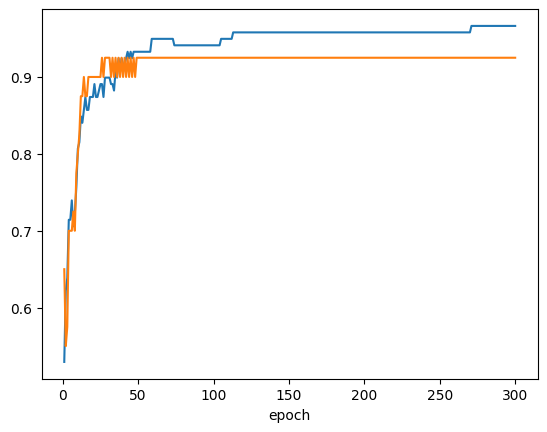

In [5]:
#반복 학습한 데이터를 시각화하기
plt.plot(np.arange(1,range_num + 1), train_score)
plt.plot(np.arange(1,range_num + 1), test_score)
plt.xlabel('epoch')
plt.show()

In [6]:
#가장 효율적인 에포크 값으로 학습시키기
sc = SGDClassifier(loss='log_loss', max_iter=100, tol=None, random_state=42)
sc.fit(train_scaled, train_target)

print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))

0.957983193277311
0.925
